In [15]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Read in the DataFrame from the CSV
df = pd.read_csv("myopia.csv")

df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [17]:
# Define the target column
labels = df['MYOPIC']

In [18]:
# Drop the MYOPIC column
df = df.drop('MYOPIC', axis=1)

df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [19]:
# Scale the data so that large values do not influence smaller values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)


df_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [20]:
# Reduce the number of dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)

df_scaled_pca = pca.fit_transform(df_scaled)

pca.explained_variance_ratio_.sum()

0.9187361702915187

In [21]:
# Further reduce the dataset dimensions with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE()

tsne_pca_output = tsne.fit_transform(df_scaled_pca)

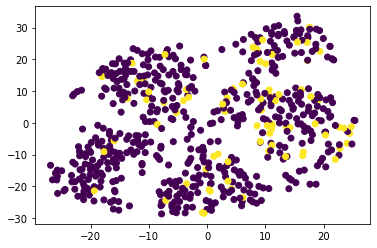

In [22]:
# Plot the clusters
plt.scatter(tsne_pca_output[:,0],tsne_pca_output[:,1],c=labels)

In [23]:
# Perform a K-means clustering by looping through different values of k 1-10
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(df_scaled_pca)
    inertia.append(km.inertia_)

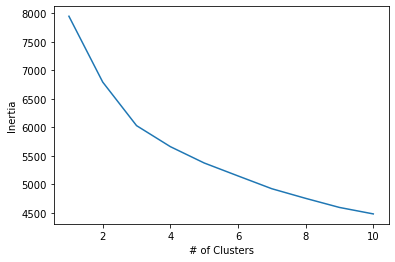

In [26]:
# plot the elbow curve
plt.plot(range(1,11), inertia)
plt.xlabel("# of Clusters");
plt.ylabel("Inertia");

# Recommendation
After doing dimentionsality reduction with PCA and further reduction with t-SNE, the K Means Clustering yields an elbow curve that makes me think that 3 is the right number of clusters. However, based on the scatter plot of the t-SNE and PCA output there's no obvious clusters. Perhaps more data would provide a clearer picture with more distinct clusters.